<a href="https://colab.research.google.com/github/manavbhagwani/Logistic-Regression---Binary-Classification/blob/main/LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf

In [ ]:
(train_raw_x, train_raw_y), (test_raw_x, test_raw_y) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 14s 0us/step


In [ ]:
def normalise(data):
  data=data.astype("float32")
  stddev=np.std(data.flatten())
  data=(data-122.5)/stddev
  return data

In [ ]:
def flatten(data):
  data=data.reshape(data.shape[0],-1)
  ones=np.ones(data.shape[0])
  data=np.insert(data,0,ones,axis=1)
  return data

In [ ]:
train_flat_x=flatten(train_raw_x)
test_flat_x=flatten(test_raw_x)
train_x=normalise(train_flat_x)
test_x=normalise(test_flat_x)
print(train_x)
print(test_x.shape)

[[-1.893231   -0.9894664  -0.94272    ...  0.00779107 -0.47525552
  -0.7868985 ]
 [-1.893231    0.49083766  0.8492271  ...  0.31943405  0.16361256
   0.3350162 ]
 [-1.893231    2.0646346   2.0646346  ... -0.66224134 -0.5687484
  -0.5999127 ]
 ...
 [-1.893231   -1.363438    0.8648092  ... -1.7218274  -1.4257666
  -1.1297058 ]
 [-1.893231    1.0362129   1.3790201  ...  1.1297058   1.051795
   0.7557342 ]
 [-1.893231    1.6594988   1.6594988  ...  0.631077    0.631077
   0.5999127 ]]
(10000, 3073)


In [ ]:
train_y=np.array([1 if i==3 else 0 for i in train_raw_y])
test_y=np.array([1 if i==3 else 0 for i in test_raw_y])

In [ ]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [ ]:
theta=np.random.rand(32*32*3+1).T/1000
theta1=np.array(theta)
print(theta)

[4.96827542e-04 3.11562927e-04 2.73402715e-04 ... 1.17290326e-04
 9.15475938e-05 9.49928930e-04]


In [ ]:
loss=[]
for j in range(1000):
  loss_step=0
  diff=0
  for i in range(50000):
    y=sigmoid(np.dot(theta,train_x[i]))
    loss_step+=train_y[i]*np.log(y)+(1-train_y[i])*np.log(1-y)
    diff+=(y-train_y[i])*train_x[i]
  theta-=0.00000025*diff
  loss_step=-1/50000*loss_step
  loss.append(loss_step)
  print(loss_step)

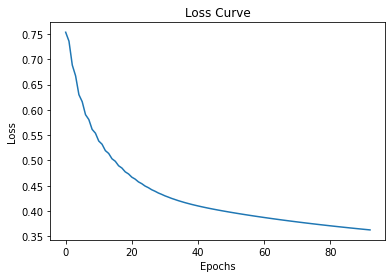

In [ ]:
plt.plot(range(len(loss)), loss, label='Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
c=0
for i in range(10000):
  y_pre=sigmoid(np.dot(theta,test_x[i]))
  if((y_pre>=0.5 and test_y[i]==1) or (y_pre<0.5 and test_y[i]==0)):
    c+=1

print(c/100)

86.54
